# Mass Shootings in the United States
Between 1966 and 2017, there have been a total of 398 mass shootings in the United States. This has been a major issue for the US and still persists to affect American lives to this day. The following project analyzes mass shootings in the US from the past 50 years. The main goal was to find any correlations between the race, genders, mental health issues, and any other factors tied to these shootings and the shooter. 

### Imports

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Dataset
The following file provides data on various mass shootings in the United States along with details of the shootings such as the locations, date of occurrence, cause, and so on. 

[More information on this topic can be found here](http://www.gannett-cdn.com/GDContent/mass-killings/index.html#title)

In [69]:
mass_shootings = pd.read_csv('Mass Shootings Dataset Ver 5.csv', encoding='latin-1')

mass_shootings = mass_shootings[mass_shootings['Mental Health Issues'].notnull()]
mass_shootings = mass_shootings[mass_shootings['Age'].notnull()]
mass_shootings = mass_shootings[mass_shootings['Age'].str.isnumeric()]
mass_shootings['Age'] = mass_shootings['Age'].astype(np.int32)
mass_shootings = mass_shootings[mass_shootings['Age'] != 0]
mass_shootings = mass_shootings[mass_shootings['Mental Health Issues'].isin(['Yes', 'No'])]
mass_shootings = mass_shootings[mass_shootings['Cause'] != 'unknown']
mass_shootings.drop('S#', axis=1, inplace=True)
mass_shootings.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

mass_shootings.head()

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender
4,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M
7,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,a nursing home,Close,coworkers,NaN,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,1.0,43,1.0,some nursing home,Yes,White,M
9,Fort Lauderdale airport shooting,"Fort Lauderdale, Florida",1/6/2017,baggage claim area of the airport,Close,random,terrorism,"Esteban Santiago, 26, flew from Alaska to Fort...",5,6,11,NaN,26,NaN,NaN,Yes,Latino,M
10,Cascade Mall shooting,"Burlington, WA",9/23/2016,cosmetics section of a Macyâs department store,Close,women,terrorism,"Arcan Cetin, 20, killed a teen girl and three ...",5,0,5,NaN,20,NaN,NaN,Yes,NaN,M
108,Trestle Trail bridge shooting,"Menasha, Wisconsin",6/11/2015,NaN,NaN,random,NaN,"Sergio Valencia del Toro, 27, in what official...",3,1,4,0.0,27,NaN,NaN,Yes,Latino,M


### Exploratory Analysis

Using a strip plot allows us to analyze whether there are correlations of attributes of the shooters, such as mental health issues and age. 

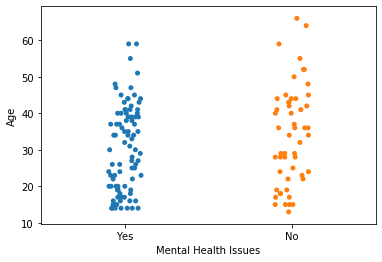

In [72]:
sns.stripplot(x="Mental Health Issues", y="Age", data=mass_shootings)

This pie chart displays the rate of victim deaths by cause, showing terrorism as the top reason

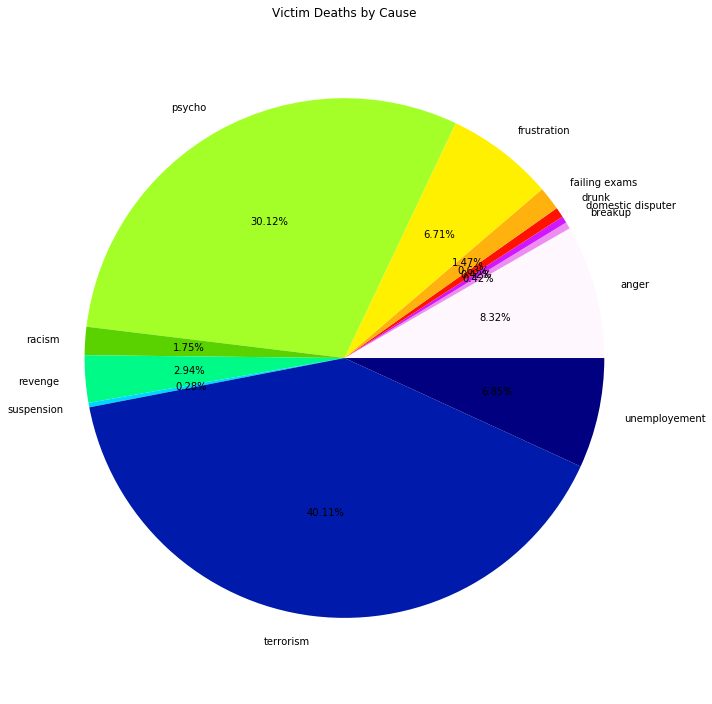

In [73]:
total_victims = mass_shootings.groupby('Cause')['Total victims'].sum()
total_victims.plot(kind='pie', 
                   title='Victim Deaths by Cause', 
                   figsize=(10,10), autopct='%1.2f%%', 
                   colormap='gist_ncar_r')
plt.axis('equal')
plt.ylabel('')
plt.tight_layout()

In [74]:
ordered_by_dates = pd.to_datetime(mass_shootings['Date']).sort_values()

Here we see an exponential growth in the number of victims to mass shootings over time. Unfortunately, the toll in lives has increased due to these violent crimes. 

Text(0.5, 1.0, 'Victims by Year')

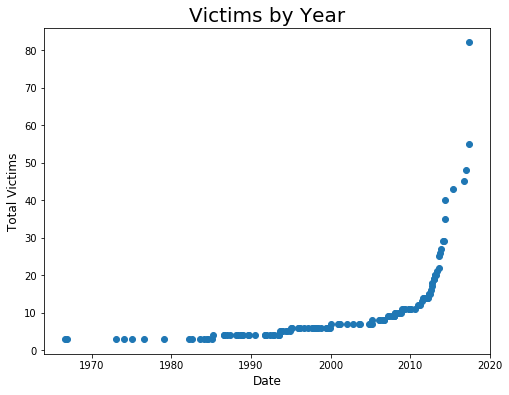

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(ordered_by_dates, np.sort(mass_shootings['Total victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.title('Victims by Year', fontsize=20)